In [119]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [120]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import warnings

In [121]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [122]:
train = pd.read_csv(r"C:\Users\scott\Desktop\dankook_dacon\dataset\train.csv", index_col=0)
test = pd.read_csv(r"C:\Users\scott\Desktop\dankook_dacon\dataset\test.csv", index_col=0)
df = pd.concat([train,test])
df

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0.0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1.0
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0.0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0.0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,19.6734,18.6617,18.2708,18.1225,18.0627,-3.1726e-04,19.3361,18.3933,18.0860,17.9861,17.9670,17,17,1.1858,1.1863,1.1855,1.1857,1.1861,NaN
399996,21.5229,20.7283,20.6087,21.0049,20.8458,6.5455e-02,21.3993,20.6399,20.5451,20.9507,20.7827,8,4,1.2850,1.2908,1.2793,1.2821,1.2878,NaN
399997,19.3991,18.2411,18.1605,18.1978,18.2018,-8.4180e-04,18.9136,17.8753,17.9047,18.0043,18.0400,1,1,1.1885,1.1886,1.1885,1.1885,1.1885,NaN


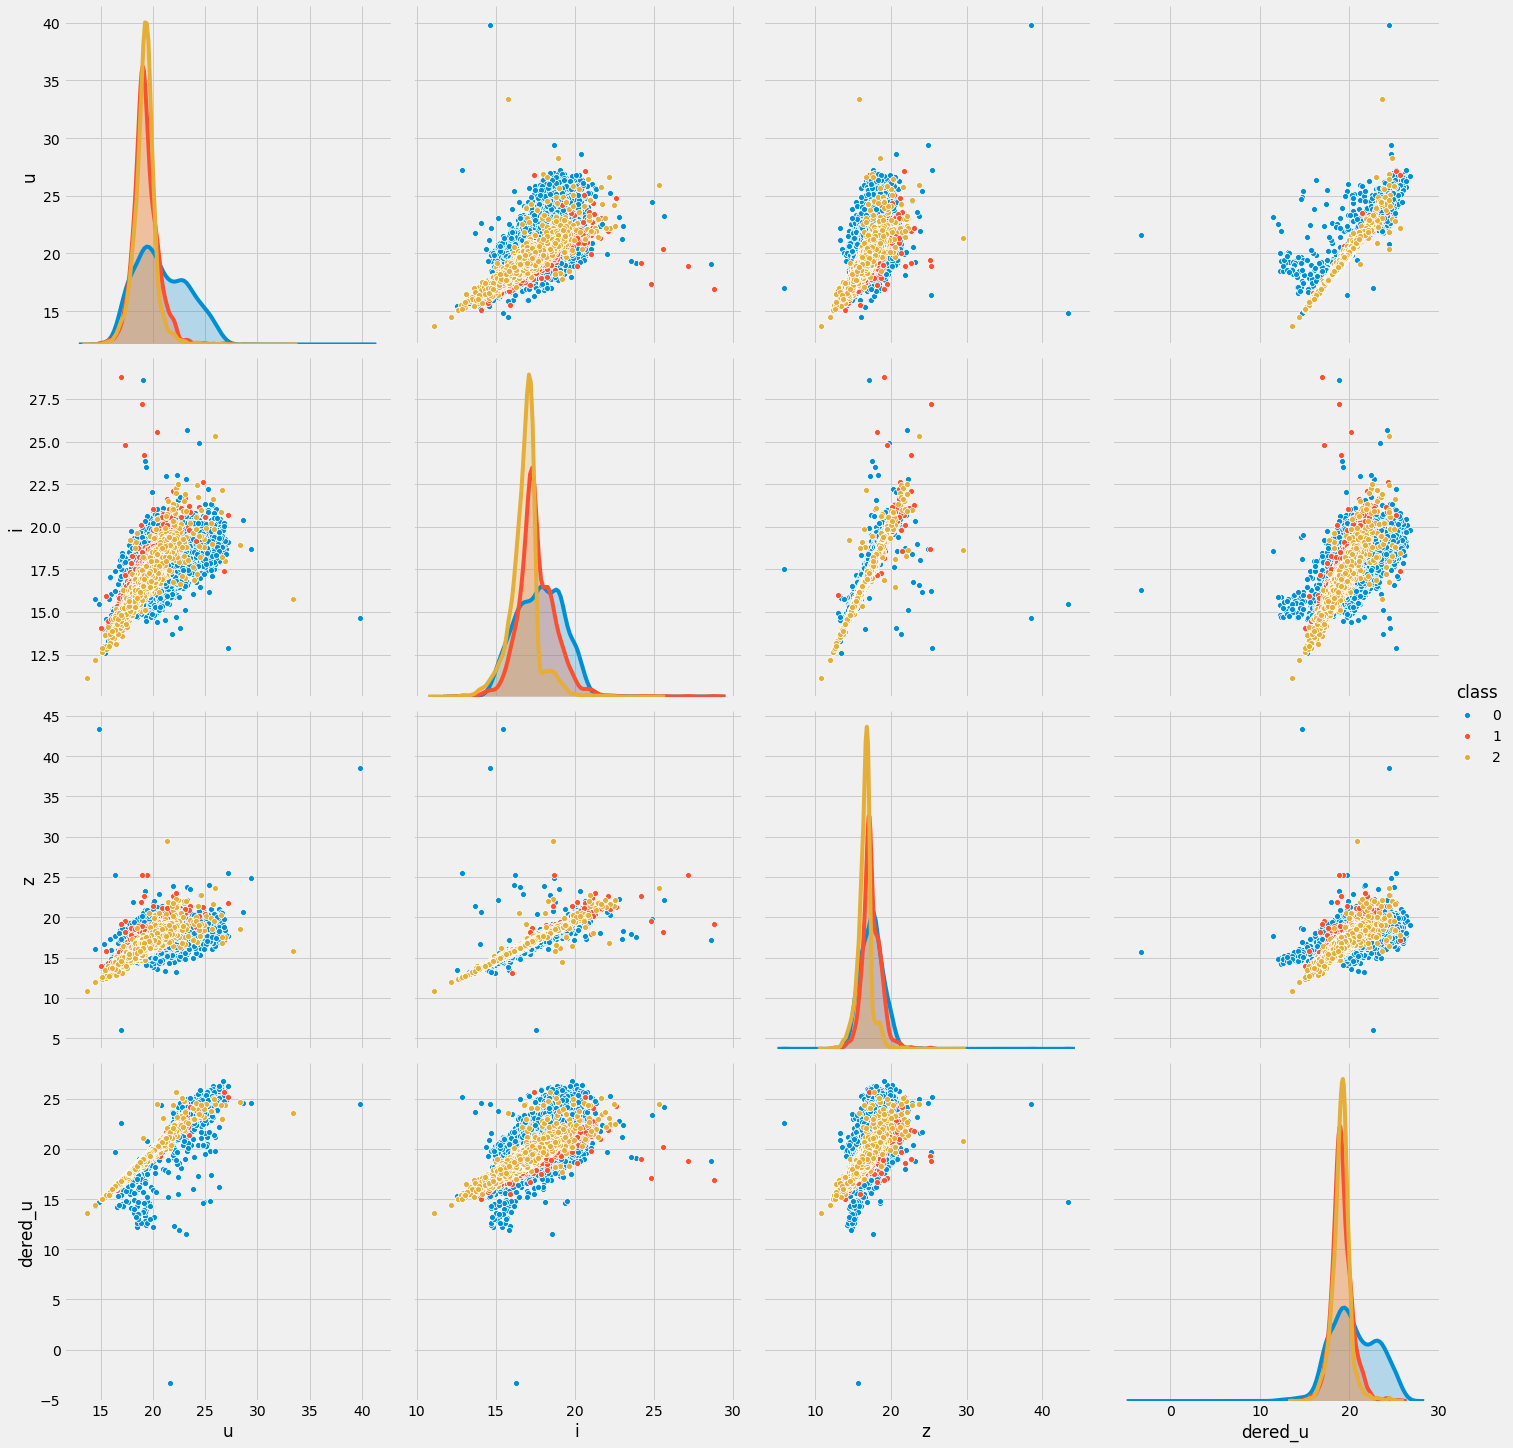

In [189]:
samp = train.sample(n=10000, random_state = 42)
sns.pairplot(data = samp, vars = ["u",'i','z',"dered_u"], hue = "class" ,size = 5 )

# 이중에서 강한 선형관계를 갖는 변수 2개 선택 : i <-> z

# 선형회귀

In [124]:
from sklearn.linear_model import LinearRegression 

# 클래스 0,1,2 중 0은 1,2와 선형관계가 떨어지므로 제외

x = train[train["class"] != 0]["i"].values
y = train[train["class"] != 0]["z"].values
print(x.shape, y.shape)

(200004,) (200004,)


초기 parameter 설정

In [125]:
alpha = .001 # learning_rate 
b = .1 
w = .1
epoch = 4

RMSE 정의

In [126]:
def rmse(y, pred_y):
    return np.sqrt(np.mean((y - pred_y) ** 2))

경사하강법

In [127]:
rmses = []
for i in tqdm(range(epoch)):
    for x_i, y_i in zip(x, y):
        p_i =  b + w * x_i                      # 예측 값 = wx+b 
        b = b + alpha * (y_i - p_i)             # 편향b updaet 
        w = w + alpha * (y_i - p_i) * x_i       # 가중치w update
    rmses.append(rmse(y, b + w * x))

In [128]:
w, b

(-4.052576036241332e+22, 7.255486906648158e+23)

In [129]:
rmses

[2665571.30975352,
 2675079391855.273,
 2.684620801674453e+18,
 2.6941962435676257e+24]

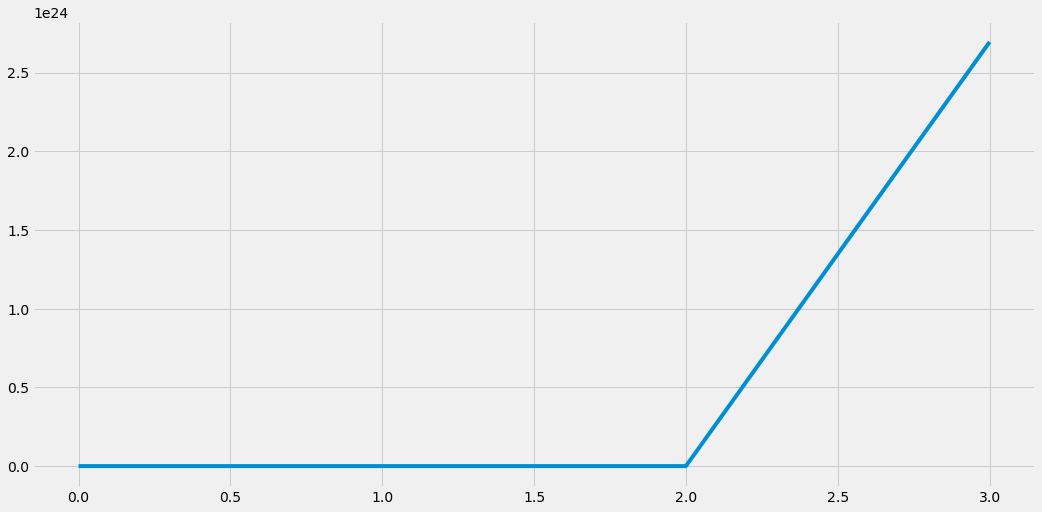

In [130]:
plt.plot(rmses)

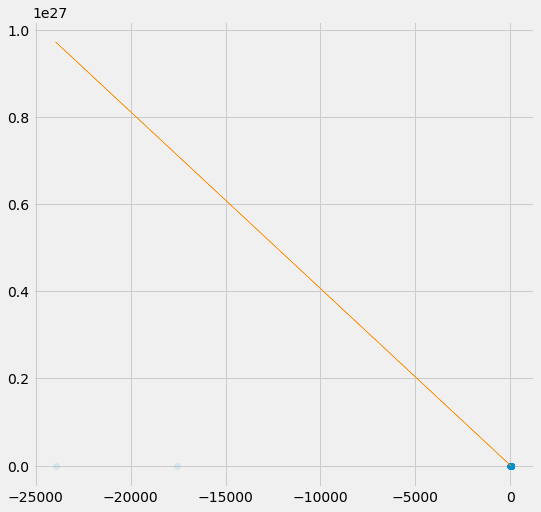

In [131]:
plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=.1)
plt.plot(x, b + w * x, color='darkorange', linewidth=.5)

# 로지스틱 회귀

In [182]:
# 이진회귀

x = train[train["class"] != 0].drop(["class"], axis=1)
y = train[train['class'] != 0]['class'].values-1

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score

lr = LogisticRegression()
lr.fit(x, y)
pred = lr.predict_proba(x)[:,1]
pred

array([0.85105447, 0.85746873, 0.95891257, ..., 0.0438423 , 0.72374728,
       0.67212019])

In [184]:
log_loss(y, pred)

0.3656598201893049

In [185]:
roc_auc_score(y, pred)

0.876265418785312

In [186]:
from sklearn.metrics import roc_curve, precision_recall_curve

def plot_roc_curve(y, p):
    fpr, tpr, _ = roc_curve(y, p)

    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


def plot_pr_curve(y, p):
    precision, recall, _ = precision_recall_curve(y, p)

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

Text(0.5, 1.0, 'Precision-Recall Curve')

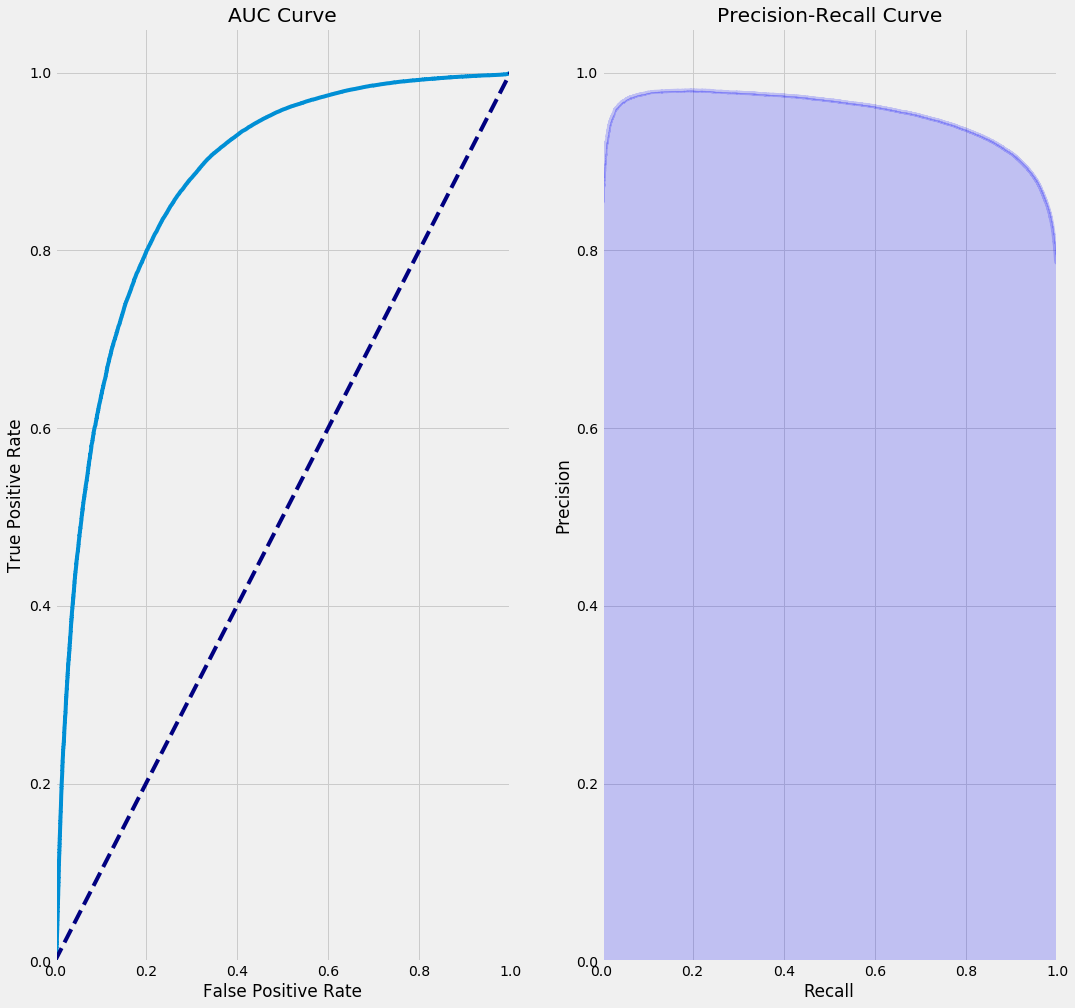

In [187]:
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plot_roc_curve(y, pred);
plt.title('AUC Curve')
plt.subplot(1, 2, 2)
plot_pr_curve(y, pred);
plt.title('Precision-Recall Curve')